In [147]:
import numpy as np 
import pandas as pd

In [148]:
import pandas as pd

df = pd.read_csv(r'/Users/pasalapavankumar/Desktop/ML PROJECTS/sms spam detection/spam.csv', encoding='ISO-8859-1')


In [149]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [150]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvement
# 7. website
# 8. Deploy

# 1. Data Cleaning

In [152]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [153]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [154]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace = True)

In [155]:
df.head(3)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


# label Encoding

In [157]:
from sklearn.preprocessing import LabelEncoder

In [158]:
encoder = LabelEncoder()

In [159]:
df['target'] = encoder.fit_transform(df['target'])

In [160]:
df.head(3)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


In [161]:
#check for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [162]:
df.duplicated().sum()

403

In [163]:
# remove duplicate
df = df.drop_duplicates(keep = 'first')

In [164]:
df.duplicated().sum()

0

In [165]:
df.shape

(5169, 2)

# 2. EDA

In [167]:
import matplotlib.pyplot as plt

In [168]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

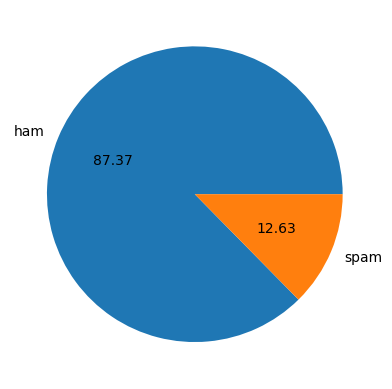

In [169]:
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct = '%0.2f')
plt.show()

In [170]:
# data is imbalanced

In [171]:
import nltk #natural language tool kit

In [172]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/pasalapavankumar/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [173]:
df['num_characters'] = df['text'].apply(len) 

/var/folders/rs/90f22nbn7gs4b6tn_k2srq040000gn/T/ipykernel_98168/1634027302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


In [174]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [175]:
# divide the sentences by words

In [177]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x))) # it states about the counting of words in sentence

/var/folders/rs/90f22nbn7gs4b6tn_k2srq040000gn/T/ipykernel_98168/2743102115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x))) # it states about the counting of words in sentence


In [179]:
df

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [181]:
df['sen_words'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

/var/folders/rs/90f22nbn7gs4b6tn_k2srq040000gn/T/ipykernel_98168/2066722366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sen_words'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [183]:
df

,target,text,num_characters,num_words,sen_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [185]:
import seaborn as sns 

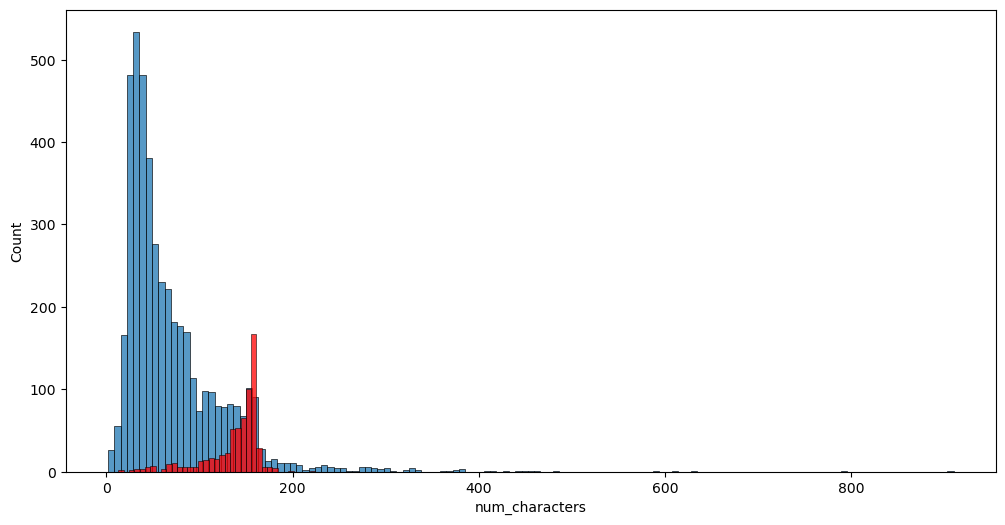

In [187]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'], color = 'red')
plt.show()

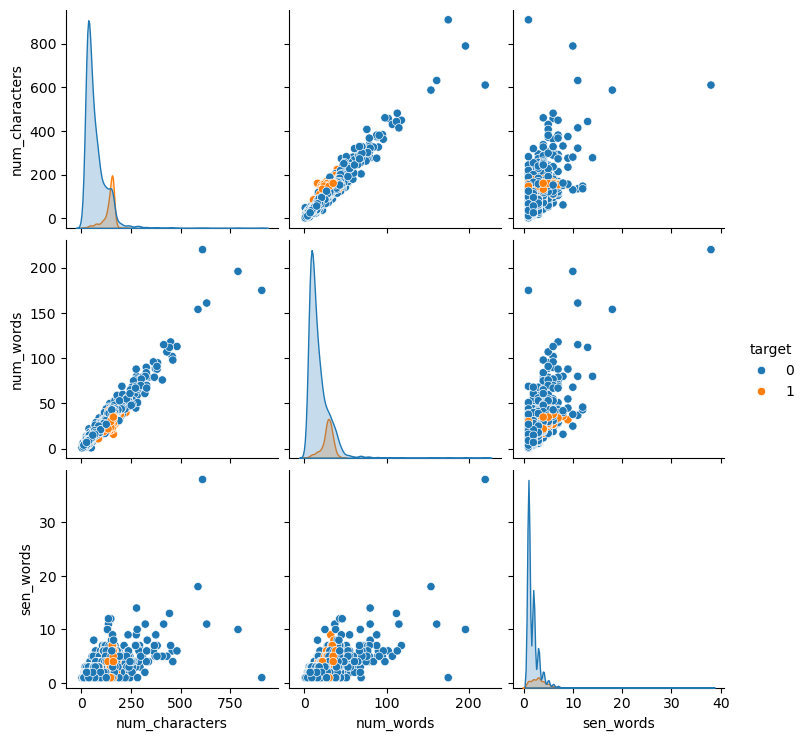

In [189]:
sns.pairplot(df, hue = 'target')    # to check the relation between them

In [190]:
# to find correlation

In [191]:
df

,target,text,num_characters,num_words,sen_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [192]:
df.corr(numeric_only=True)

,target,num_characters,num_words,sen_words
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
sen_words,0.263939,0.624139,0.679971,1.000000


<Axes: >

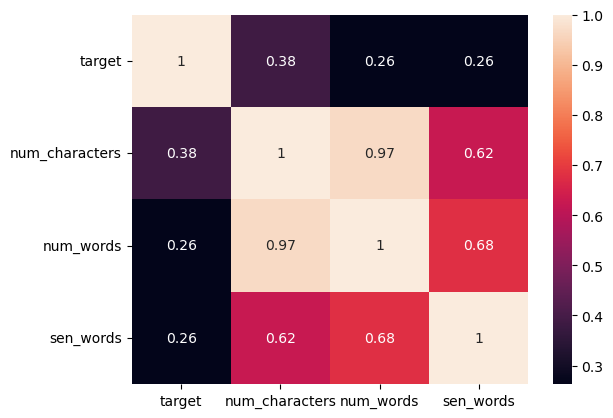

In [198]:
sns.heatmap(df.corr(numeric_only = True), annot = True)








# 3. Data Preprocessing 
 * lower case
 * tokenization
 * removing special characters
 * removing stop words and puncuation marks
 * stemming

In [201]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pasalapavankumar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [203]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [205]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [241]:
def transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]      # it is list so we used to slicer to clone
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [243]:
transform('Hi i m a dancer,,,, like too dancing in the stage performancing')

'hi dancer like danc stage performanc'

In [245]:
df['text'].apply(transform)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [246]:
df['transformed_text'] = df['text'].apply(transform)

/var/folders/rs/90f22nbn7gs4b6tn_k2srq040000gn/T/ipykernel_98168/4143821896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform)


In [247]:
df.head()

,target,text,num_characters,num_words,sen_words,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [249]:
df['transformed_text'].iloc[9]

'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030'

In [250]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [251]:
from wordcloud import WordCloud # it is used to show most repeated words 

In [257]:
wc = WordCloud(width=500, height = 500, min_font_size = 10, background_color = 'white')

In [259]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

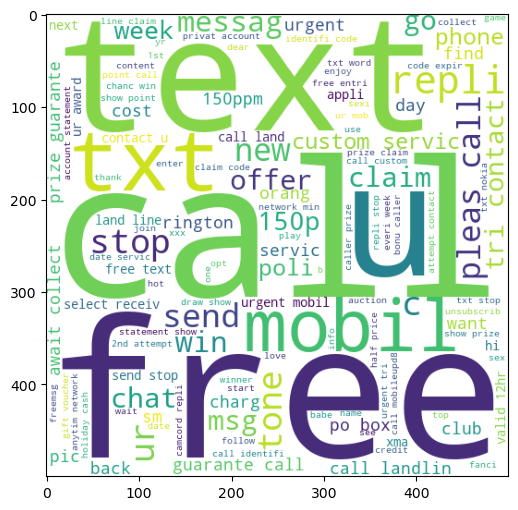

In [261]:
plt.figure(figsize=(20, 6))
plt.imshow(spam_wc)

In [263]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

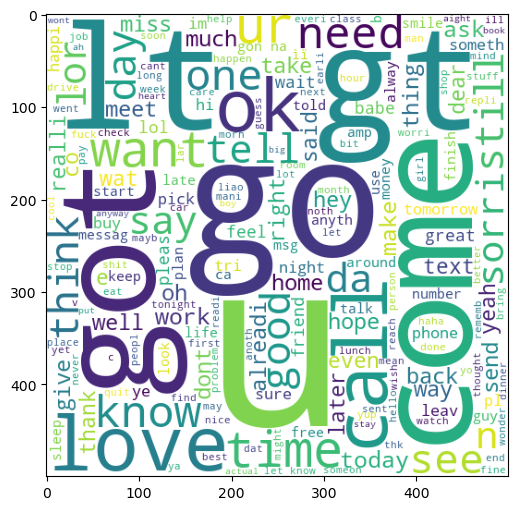

In [265]:
plt.figure(figsize=(20, 6))
plt.imshow(ham_wc)

In [273]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)

In [275]:
len(spam_corpus)

9939

In [281]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

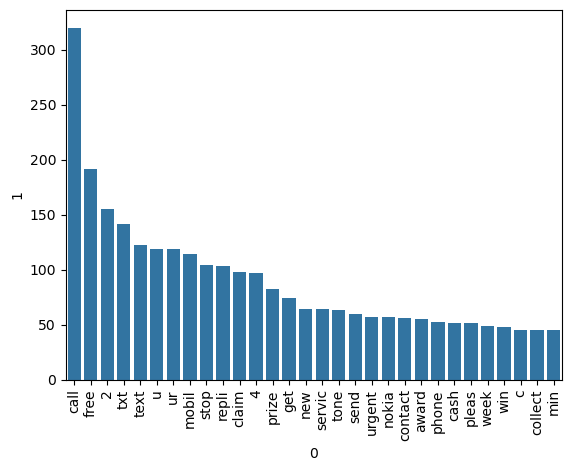

In [301]:
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1], data=pd.DataFrame(Counter(spam_corpus).most_common(30)))
plt.xticks(rotation = 'vertical')
plt.show()

In [305]:
ham_corpus=[]
for i in df[df['target']==0]['transformed_text'].tolist():
    for words in i.split():
        ham_corpus.append(words)
        

In [311]:
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


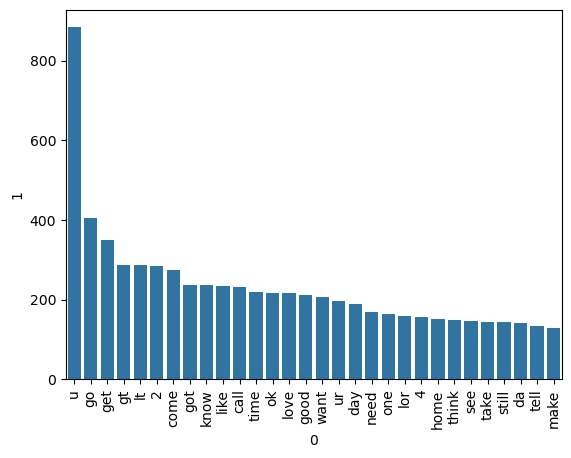

In [319]:
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1], data= pd.DataFrame(Counter(ham_corpus).most_common(30)))
plt.xticks(rotation = 'vertical')
plt.show()

# Model Building

In [322]:
df.head()

,target,text,num_characters,num_words,sen_words,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [362]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [328]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [330]:
X.shape

(5169, 6708)

In [332]:
y = df['target'].values

In [334]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [336]:
from sklearn.model_selection import train_test_split

In [338]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 2)

In [346]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [348]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [352]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [356]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [360]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [394]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [396]:
X.shape

(5169, 6708)

In [398]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 2)

In [400]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [402]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [404]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [406]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [408]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [410]:
import pickle

In [412]:
pickle.dump(tfidf, open('vectorier.pkl', 'wb'))

In [414]:
pickle.dump(mnb, open('model.pkl', 'wb'))